In [14]:
import numpy as np
import pandas as pd
import os
import time
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn")
sns.set(font_scale=1)

In [15]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [ ]:
var_list = ["var_108","var_34","var_9","var_94","var_127","var_13","var_123","var_1","var_80","var_2"]

In [ ]:
def ext_feat(var_list, df):
    for i, values in enumerate(var_list):
        if i<(len(var_list)-1):
            df[var_list[i]+"+"+var_list[i+1]] = df[var_list[i]] + df[var_list[i+1]]
            df[var_list[i]+"-"+var_list[i+1]] = df[var_list[i]] - df[var_list[i+1]]
            df[var_list[i]+"*"+var_list[i+1]] = df[var_list[i]] * df[var_list[i+1]]
            df[var_list[i]+"/"+var_list[i+1]] = df[var_list[i]] / df[var_list[i+1]]
        if i<(len(var_list)-2):
            df[var_list[i]+"+"+var_list[i+2]] = df[var_list[i]] + df[var_list[i+2]]
            df[var_list[i]+"-"+var_list[i+2]] = df[var_list[i]] - df[var_list[i+2]]
            df[var_list[i]+"*"+var_list[i+2]] = df[var_list[i]] * df[var_list[i+2]]
            df[var_list[i]+"/"+var_list[i+2]] = df[var_list[i]] / df[var_list[i+2]]
        if i<(len(var_list)-3):
            df[var_list[i]+"+"+var_list[i+3]] = df[var_list[i]] + df[var_list[i+3]]
            df[var_list[i]+"-"+var_list[i+3]] = df[var_list[i]] - df[var_list[i+3]]
            df[var_list[i]+"*"+var_list[i+3]] = df[var_list[i]] * df[var_list[i+3]]
            df[var_list[i]+"/"+var_list[i+3]] = df[var_list[i]] / df[var_list[i+3]]
        if i<(len(var_list)-4):
            df[var_list[i]+"+"+var_list[i+4]] = df[var_list[i]] + df[var_list[i+4]]
            df[var_list[i]+"-"+var_list[i+4]] = df[var_list[i]] - df[var_list[i+4]]
            df[var_list[i]+"*"+var_list[i+4]] = df[var_list[i]] * df[var_list[i+4]]
            df[var_list[i]+"/"+var_list[i+4]] = df[var_list[i]] / df[var_list[i+4]]
        if i<(len(var_list)-5):
            df[var_list[i]+"+"+var_list[i+5]] = df[var_list[i]] + df[var_list[i+5]]
            df[var_list[i]+"-"+var_list[i+5]] = df[var_list[i]] - df[var_list[i+5]]
            df[var_list[i]+"*"+var_list[i+5]] = df[var_list[i]] * df[var_list[i+5]]
            df[var_list[i]+"/"+var_list[i+5]] = df[var_list[i]] / df[var_list[i+5]]
        if i<(len(var_list)-6):
            df[var_list[i]+"+"+var_list[i+6]] = df[var_list[i]] + df[var_list[i+6]]
            df[var_list[i]+"-"+var_list[i+6]] = df[var_list[i]] - df[var_list[i+6]]
            df[var_list[i]+"*"+var_list[i+6]] = df[var_list[i]] * df[var_list[i+6]]
            df[var_list[i]+"/"+var_list[i+6]] = df[var_list[i]] / df[var_list[i+6]]
        if i<(len(var_list)-7):
            df[var_list[i]+"+"+var_list[i+7]] = df[var_list[i]] + df[var_list[i+7]]
            df[var_list[i]+"-"+var_list[i+7]] = df[var_list[i]] - df[var_list[i+7]]
            df[var_list[i]+"*"+var_list[i+7]] = df[var_list[i]] * df[var_list[i+7]]
            df[var_list[i]+"/"+var_list[i+7]] = df[var_list[i]] / df[var_list[i+7]]
        if i<(len(var_list)-8):
            df[var_list[i]+"+"+var_list[i+8]] = df[var_list[i]] + df[var_list[i+8]]
            df[var_list[i]+"-"+var_list[i+8]] = df[var_list[i]] - df[var_list[i+8]]
            df[var_list[i]+"*"+var_list[i+8]] = df[var_list[i]] * df[var_list[i+8]]
            df[var_list[i]+"/"+var_list[i+8]] = df[var_list[i]] / df[var_list[i+8]]
        if i<(len(var_list)-9):
            df[var_list[i]+"+"+var_list[i+9]] = df[var_list[i]] + df[var_list[i+9]]
            df[var_list[i]+"-"+var_list[i+9]] = df[var_list[i]] - df[var_list[i+9]]
            df[var_list[i]+"*"+var_list[i+9]] = df[var_list[i]] * df[var_list[i+9]]
            df[var_list[i]+"/"+var_list[i+9]] = df[var_list[i]] / df[var_list[i+9]]
        else:
            continue
    
    return df

In [ ]:
df_train = ext_feat(var_list, df_train)
df_test = ext_feat(var_list, df_test)

In [16]:
# random_state = 42
# np.random.seed(random_state)

def augment(x,y,t=5):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//4):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

In [17]:
lgb_params = {
    "objective" : "binary",
    "metric" : "auc",
    "boosting": 'gbdt',
    "max_depth" : -1,
    "num_leaves" : 13,
    "learning_rate" : 0.0053,
    "bagging_freq": 5,
    "bagging_fraction" : 0.335,
    "feature_fraction" : 0.041,
    "min_data_in_leaf": 80,
#     'subsample': 0.85,
#     'min_child_weight': 1.5,
#     'num_leaves': 2 ** 5,
#     'colsample_bytree': 0.8,
    "min_sum_heassian_in_leaf": 10,
    "tree_learner": "serial",
    "boost_from_average": "false",
#     "lambda_l1" : 5,
#     "lambda_l2" : 5,
#     "bagging_seed" : random_state,
    "verbosity" : 1,
#     "seed": random_state,
    "n_jobs": -1
}



In [18]:
skf = StratifiedKFold(n_splits=13, shuffle=True)
oof = df_train[['ID_code', 'target']]
oof['predict'] = 0
predictions = df_test[['ID_code']]
val_aucs = []
feature_importance_df = pd.DataFrame()

In [19]:
features = [col for col in df_train.columns if col not in ['target', 'ID_code']]
X_test = df_test[features].values

In [20]:
for fold, (trn_idx, val_idx) in enumerate(skf.split(df_train, df_train['target'])):
    X_train, y_train = df_train.iloc[trn_idx][features], df_train.iloc[trn_idx]['target']
    X_valid, y_valid = df_train.iloc[val_idx][features], df_train.iloc[val_idx]['target']
    
    N = 2
    p_valid,yp = 0,0
    for i in range(N):
        X_t, y_t = augment(X_train.values, y_train.values)
        X_t = pd.DataFrame(X_t)
        X_t = X_t.add_prefix('var_')
    
        trn_data = lgb.Dataset(X_t, label=y_t)
        val_data = lgb.Dataset(X_valid, label=y_valid)
        evals_result = {}
        lgb_clf = lgb.train(lgb_params,
                        trn_data,
                        1000000,
                        valid_sets = [trn_data, val_data],
                        early_stopping_rounds=4000,
                        verbose_eval = 1000,
                        evals_result=evals_result
                       )
        p_valid += lgb_clf.predict(X_valid)
        yp += lgb_clf.predict(X_test)
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = lgb_clf.feature_importance()
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    oof['predict'][val_idx] = p_valid/N
    val_score = roc_auc_score(y_valid, p_valid)
    val_aucs.append(val_score)
    
    predictions['fold{}'.format(fold+1)] = yp/N

Training until validation scores don't improve for 4000 rounds.
[1000]	training's auc: 0.889609	valid_1's auc: 0.883236
[2000]	training's auc: 0.895335	valid_1's auc: 0.887464
[3000]	training's auc: 0.898956	valid_1's auc: 0.890898
[4000]	training's auc: 0.901718	valid_1's auc: 0.893037
[5000]	training's auc: 0.903922	valid_1's auc: 0.894594
[6000]	training's auc: 0.905802	valid_1's auc: 0.89602
[7000]	training's auc: 0.907563	valid_1's auc: 0.897227
[8000]	training's auc: 0.909121	valid_1's auc: 0.898166
[9000]	training's auc: 0.910506	valid_1's auc: 0.898889
[10000]	training's auc: 0.911799	valid_1's auc: 0.899452
[11000]	training's auc: 0.912984	valid_1's auc: 0.899854
[12000]	training's auc: 0.91403	valid_1's auc: 0.900225
[13000]	training's auc: 0.915016	valid_1's auc: 0.900525
[14000]	training's auc: 0.915927	valid_1's auc: 0.90068
[15000]	training's auc: 0.916813	valid_1's auc: 0.900763
[16000]	training's auc: 0.917638	valid_1's auc: 0.900733
[17000]	training's auc: 0.918444	val

Training until validation scores don't improve for 4000 rounds.
[1000]	training's auc: 0.889017	valid_1's auc: 0.892147
[2000]	training's auc: 0.894809	valid_1's auc: 0.897551
[3000]	training's auc: 0.898453	valid_1's auc: 0.900621
[4000]	training's auc: 0.901219	valid_1's auc: 0.902859
[5000]	training's auc: 0.903405	valid_1's auc: 0.904545
[6000]	training's auc: 0.905317	valid_1's auc: 0.905827
[7000]	training's auc: 0.907047	valid_1's auc: 0.906925
[8000]	training's auc: 0.908615	valid_1's auc: 0.90782
[9000]	training's auc: 0.909973	valid_1's auc: 0.908555
[10000]	training's auc: 0.911251	valid_1's auc: 0.909287
[11000]	training's auc: 0.91242	valid_1's auc: 0.909883
[12000]	training's auc: 0.913467	valid_1's auc: 0.910237
[13000]	training's auc: 0.914429	valid_1's auc: 0.910484
[14000]	training's auc: 0.91534	valid_1's auc: 0.910791
[15000]	training's auc: 0.916205	valid_1's auc: 0.910958
[16000]	training's auc: 0.917018	valid_1's auc: 0.911051
[17000]	training's auc: 0.917817	val

[8000]	training's auc: 0.909563	valid_1's auc: 0.888704
[9000]	training's auc: 0.910927	valid_1's auc: 0.889722
[10000]	training's auc: 0.912196	valid_1's auc: 0.890613
[11000]	training's auc: 0.913341	valid_1's auc: 0.891191
[12000]	training's auc: 0.914382	valid_1's auc: 0.891654
[13000]	training's auc: 0.915329	valid_1's auc: 0.892109
[14000]	training's auc: 0.916224	valid_1's auc: 0.892444
[15000]	training's auc: 0.917081	valid_1's auc: 0.892732
[16000]	training's auc: 0.917899	valid_1's auc: 0.89307
[17000]	training's auc: 0.918692	valid_1's auc: 0.893242
[18000]	training's auc: 0.919456	valid_1's auc: 0.893322
[19000]	training's auc: 0.920211	valid_1's auc: 0.893446
[20000]	training's auc: 0.92096	valid_1's auc: 0.893502
[21000]	training's auc: 0.921688	valid_1's auc: 0.893581
[22000]	training's auc: 0.922394	valid_1's auc: 0.893653
[23000]	training's auc: 0.923107	valid_1's auc: 0.893738
[24000]	training's auc: 0.923815	valid_1's auc: 0.893781
[25000]	training's auc: 0.924508	va

[29000]	training's auc: 0.926402	valid_1's auc: 0.904538
Early stopping, best iteration is:
[25546]	training's auc: 0.924042	valid_1's auc: 0.904658
Training until validation scores don't improve for 4000 rounds.
[1000]	training's auc: 0.88991	valid_1's auc: 0.88682
[2000]	training's auc: 0.895448	valid_1's auc: 0.891092
[3000]	training's auc: 0.899016	valid_1's auc: 0.893932
[4000]	training's auc: 0.901798	valid_1's auc: 0.896371
[5000]	training's auc: 0.903947	valid_1's auc: 0.898078
[6000]	training's auc: 0.905851	valid_1's auc: 0.899715
[7000]	training's auc: 0.907592	valid_1's auc: 0.901052
[8000]	training's auc: 0.909126	valid_1's auc: 0.902294
[9000]	training's auc: 0.910521	valid_1's auc: 0.903191
[10000]	training's auc: 0.911784	valid_1's auc: 0.903932
[11000]	training's auc: 0.912936	valid_1's auc: 0.904567
[12000]	training's auc: 0.91399	valid_1's auc: 0.904976
[13000]	training's auc: 0.914972	valid_1's auc: 0.905312
[14000]	training's auc: 0.915875	valid_1's auc: 0.905485
[

[22000]	training's auc: 0.922522	valid_1's auc: 0.904343
[23000]	training's auc: 0.923236	valid_1's auc: 0.904404
[24000]	training's auc: 0.923938	valid_1's auc: 0.904426
[25000]	training's auc: 0.924635	valid_1's auc: 0.904382
[26000]	training's auc: 0.925316	valid_1's auc: 0.904338
[27000]	training's auc: 0.925997	valid_1's auc: 0.904286
Early stopping, best iteration is:
[23574]	training's auc: 0.923642	valid_1's auc: 0.904457
Training until validation scores don't improve for 4000 rounds.
[1000]	training's auc: 0.890155	valid_1's auc: 0.882825
[2000]	training's auc: 0.895694	valid_1's auc: 0.88788
[3000]	training's auc: 0.899229	valid_1's auc: 0.891423
[4000]	training's auc: 0.901948	valid_1's auc: 0.894314
[5000]	training's auc: 0.904149	valid_1's auc: 0.896086
[6000]	training's auc: 0.906056	valid_1's auc: 0.897826
[7000]	training's auc: 0.907806	valid_1's auc: 0.89913
[8000]	training's auc: 0.90935	valid_1's auc: 0.900272
[9000]	training's auc: 0.910745	valid_1's auc: 0.901199
[

[8000]	training's auc: 0.908968	valid_1's auc: 0.893277
[9000]	training's auc: 0.910335	valid_1's auc: 0.894411
[10000]	training's auc: 0.911625	valid_1's auc: 0.89529
[11000]	training's auc: 0.912782	valid_1's auc: 0.896009
[12000]	training's auc: 0.913834	valid_1's auc: 0.896521
[13000]	training's auc: 0.914827	valid_1's auc: 0.897011
[14000]	training's auc: 0.915742	valid_1's auc: 0.897313
[15000]	training's auc: 0.916611	valid_1's auc: 0.897624
[16000]	training's auc: 0.917432	valid_1's auc: 0.89781
[17000]	training's auc: 0.918233	valid_1's auc: 0.897931
[18000]	training's auc: 0.919011	valid_1's auc: 0.898045
[19000]	training's auc: 0.919782	valid_1's auc: 0.898136
[20000]	training's auc: 0.920524	valid_1's auc: 0.898177
[21000]	training's auc: 0.921256	valid_1's auc: 0.898271
[22000]	training's auc: 0.921975	valid_1's auc: 0.898301
[23000]	training's auc: 0.922693	valid_1's auc: 0.898306
[24000]	training's auc: 0.923396	valid_1's auc: 0.898285
[25000]	training's auc: 0.924096	va

In [21]:
mean_auc = np.mean(val_aucs)
std_auc = np.std(val_aucs)
all_auc = roc_auc_score(oof['target'], oof['predict'])
print("Mean auc: %.9f, std: %.9f. All auc: %.9f." % (mean_auc, std_auc, all_auc))

Mean auc: 0.901729467, std: 0.004546824. All auc: 0.901678174.


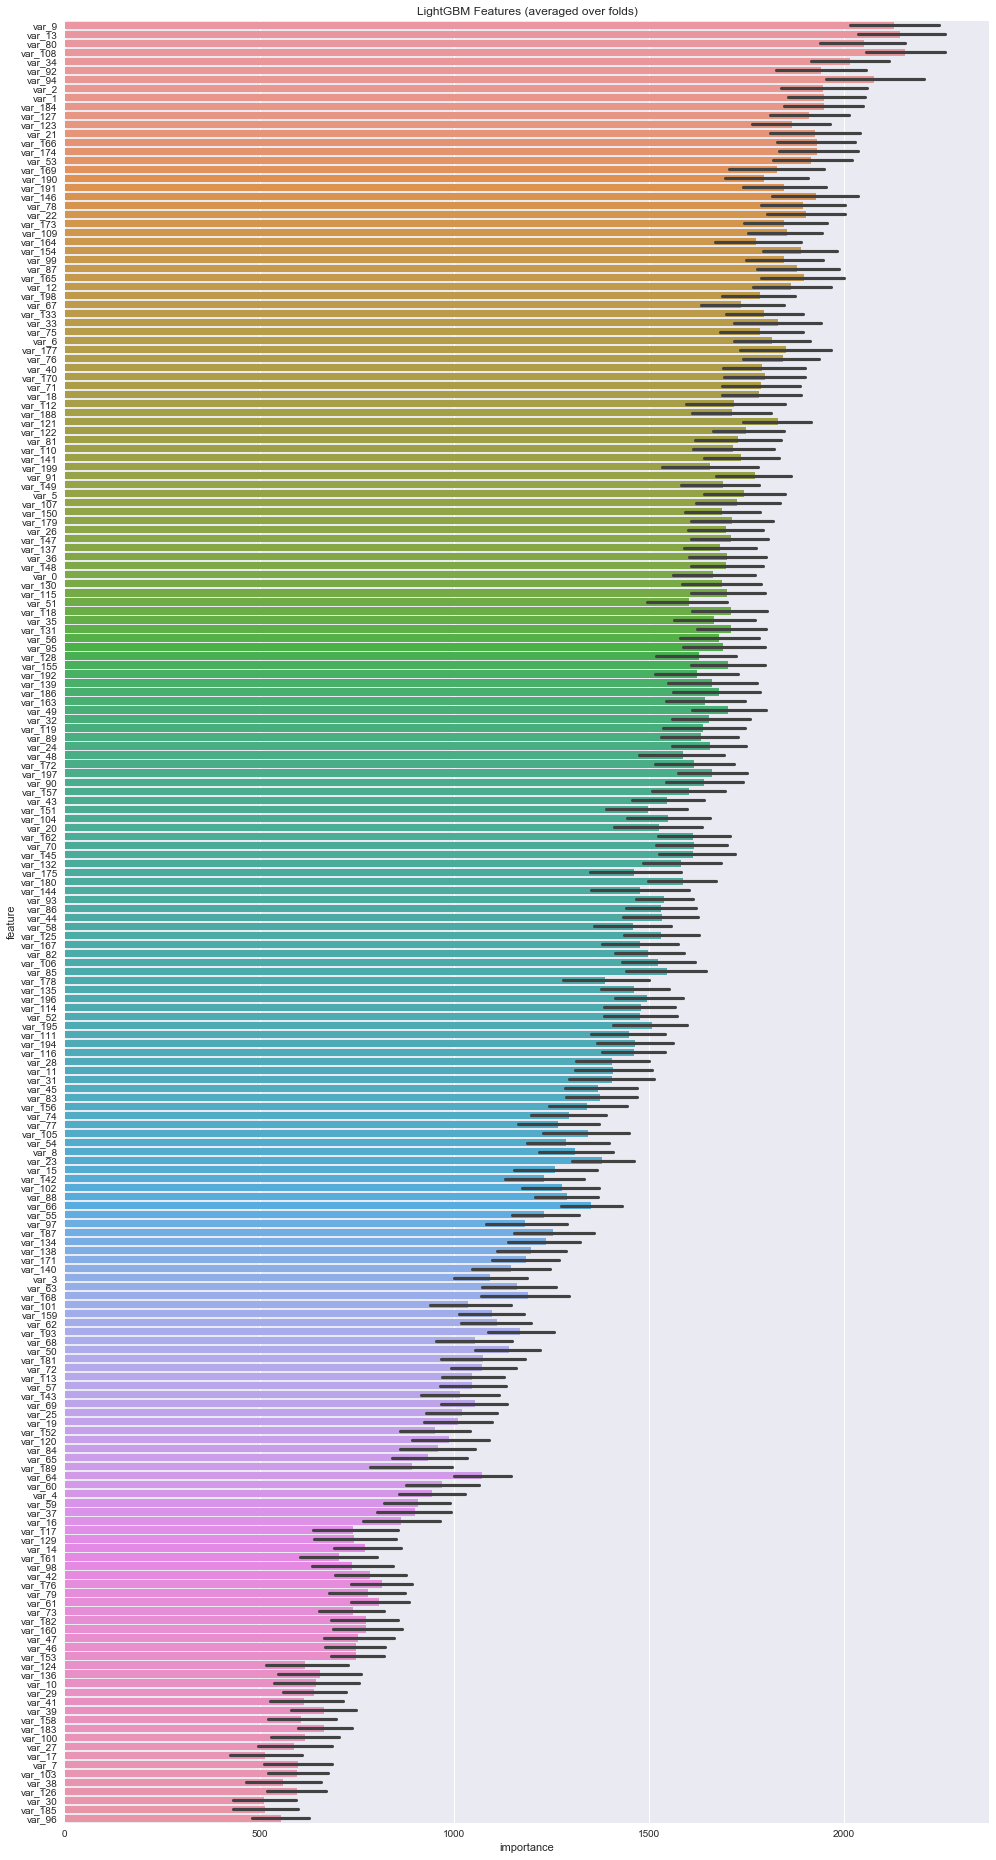

In [22]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [23]:
predictions['target'] = np.mean(predictions[[col for col in predictions.columns if col not in ['ID_code', 'target']]].values, axis=1)
predictions.to_csv('lgb_all_predictions.csv', index=None)
sub_df = pd.DataFrame({"ID_code":df_test["ID_code"].values})
sub_df["target"] = predictions['target']
sub_df.to_csv("lgb_submission.csv", index=False)
predictions[["ID_code", "target"]].to_csv("../submission/lgb_oof"+str(int(time.strftime("%Y%m%d%H%M%S", time.localtime(time.time()))))+".csv", index=False)